# importing primary modules

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [18]:
tf.keras.backend.clear_session()

# data generation

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = '/content/drive/MyDrive/dataset/new_covid data/train'
test_dir = '/content/drive/MyDrive/dataset/new_covid data/test'

# Data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2, # 20% validation split
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


# Model defining and building

In [20]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Load the ResNet50 model with pre-trained ImageNet weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

x = Dense(512, activation='relu')(x)

x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(3, activation='softmax')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the Model

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
#from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

# Training the model

In [23]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    #callbacks=[early_stopping, checkpoint]
)

Epoch 1/25
38/38 [==============================] - 324s 8s/step - loss: 1.2032 - accuracy: 0.3442 - val_loss: 1.1187 - val_accuracy: 0.3333
Epoch 2/25
38/38 [==============================] - 316s 8s/step - loss: 1.0919 - accuracy: 0.4017 - val_loss: 1.0668 - val_accuracy: 0.3367
Epoch 3/25
38/38 [==============================] - 295s 8s/step - loss: 1.0798 - accuracy: 0.3725 - val_loss: 1.0349 - val_accuracy: 0.6067
Epoch 4/25
38/38 [==============================] - 293s 8s/step - loss: 0.9823 - accuracy: 0.4883 - val_loss: 0.8402 - val_accuracy: 0.5833
Epoch 5/25
38/38 [==============================] - 293s 8s/step - loss: 0.9152 - accuracy: 0.5575 - val_loss: 0.8184 - val_accuracy: 0.6433
Epoch 6/25
38/38 [==============================] - 317s 8s/step - loss: 0.9361 - accuracy: 0.5200 - val_loss: 0.8637 - val_accuracy: 0.5833
Epoch 7/25
38/38 [==============================] - 294s 8s/step - loss: 0.8747 - accuracy: 0.5775 - val_loss: 0.7698 - val_accuracy: 0.6467
Epoch 8/25
38

# plotting accuracy and loss curves

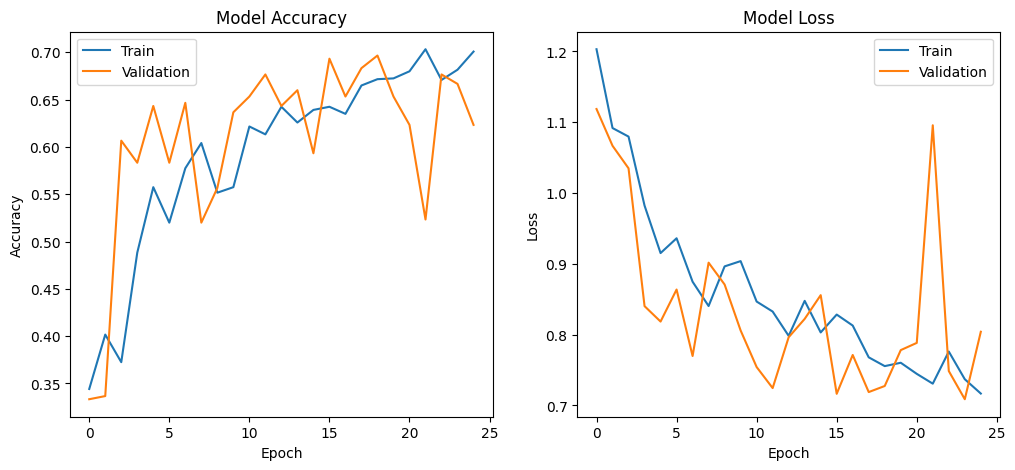

In [26]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

# Evaluate the model with the test data

In [27]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.2f}')

10/10 [==============================] - 81s 8s/step - loss: 1.2303 - accuracy: 0.4900
Test Accuracy: 0.49
